In [37]:
# importing python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [38]:
# reading data from a CSV file into a DataFrame

df_csv = pd.read_csv('car_dataset.csv')

In [39]:
df = pd.DataFrame(df_csv)
pd.set_option('display.expand_frame_repr', False) # expanding the table to show it in one row
pd.set_option('display.max_colwidth', 20)  # set maximum column width to 40 characters
print(df)

          Make       Model  Year     Engine Fuel Type  Engine HP  Engine Cylinders Transmission Type      Driven_Wheels  Number of Doors      Market Category Vehicle Size  Vehicle Style  highway MPG  city mpg  Popularity   MSRP
0          BMW  1 Series M  2011  premium unleaded...        335                 6            MANUAL   rear wheel drive                2  Factory Tuner,Lu...      Compact          Coupe           26        19        3916  46135
1          BMW    1 Series  2011  premium unleaded...        300                 6            MANUAL   rear wheel drive                2   Luxury,Performance      Compact    Convertible           28        19        3916  40650
2          BMW    1 Series  2011  premium unleaded...        300                 6            MANUAL   rear wheel drive                2  Luxury,High-Perf...      Compact          Coupe           28        20        3916  36350
3          BMW    1 Series  2011  premium unleaded...        230                 6      

## Section 1:

In [40]:
# What is the average MSRP (Manufacturer's Suggested Retail Price) of vehicles in the dataset?

average_msrp = df["MSRP"].mean().round(2)
print(f"The average manufacturer's suggested retail price (MSRP) of vehicles in the dataset is: {average_msrp}")

The average manufacturer's suggested retail price (MSRP) of vehicles in the dataset is: 40627.12


In [41]:
# What is the highest MSRP among the vehicles?

max_msrp = df["MSRP"].max()
print(f"The highest MSRP among the vehicles is: {max_msrp}")

The highest MSRP among the vehicles is: 2065902


In [42]:
# How many unique vehicle styles are present in the dataset?

import textwrap # importing the library to wrap the row with a specified width

unique_styles = ", ".join(df["Vehicle Style"].unique())
unique_styles_wrapped_text = textwrap.fill(unique_styles, width=110)
unique_styles_number = df["Vehicle Style"].nunique()

print(f"We have a number of unique styles in the dataset which are: {unique_styles_wrapped_text} with the total number of {unique_styles_number}.")

We have a number of unique styles in the dataset which are: Coupe, Convertible, Sedan, Wagon, 4dr Hatchback, 2dr Hatchback, 4dr SUV, Passenger Minivan, Cargo Minivan,
Crew Cab Pickup, Regular Cab Pickup, Extended Cab Pickup, 2dr SUV, Cargo Van, Convertible SUV, Passenger Van with the total number of 16.


In [43]:
# What is the correlation between highway MPG and city MPG?

corr_mpg = df["highway MPG"].corr(df["city mpg"]).round(4)
print(f"The correlation between highway MPG and city MPG is: {corr_mpg}")

The correlation between highway MPG and city MPG is: 0.8329


In [44]:
# What is the most common transmission type among the vehicles?

freq_transmission = df["Transmission Type"].mode().values[0]
print(f"The most frequent type of transmission is: {freq_transmission}")

The most frequent type of transmission is: AUTOMATIC


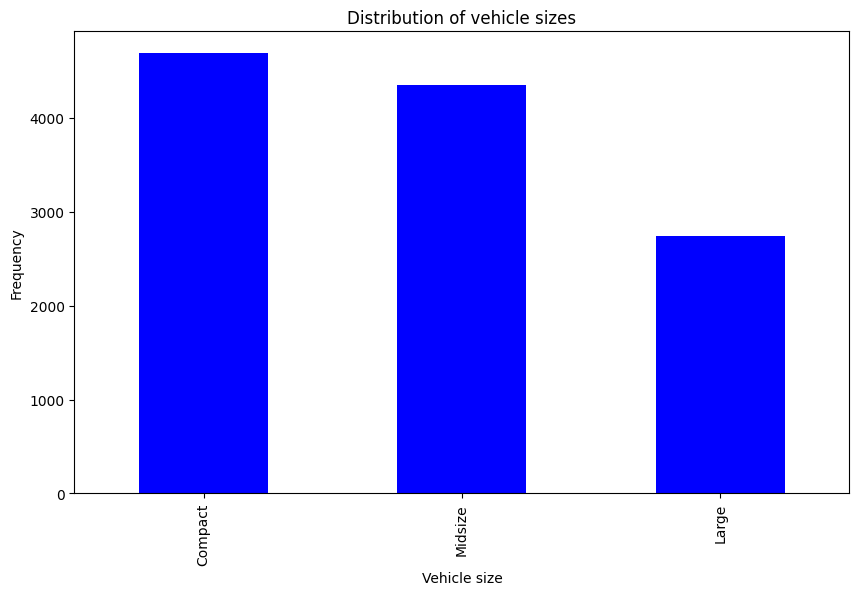

In [45]:
# What is the distribution of vehicle sizes in the dataset?

vehicle_size_distribution = df["Vehicle Size"].value_counts()

plt.figure(figsize = (10, 6))
vehicle_size_distribution.plot(kind = 'bar', color = 'blue')
plt.title('Distribution of vehicle sizes')
plt.xlabel('Vehicle size')
plt.ylabel('Frequency')
plt.show()

In [46]:
# How many vehicles have a number of doors specified?

vehicle_doors = df["Number of Doors"].count()
print(f"Each vehicle in the dataset got their number of doors specified, and the total number of the vehicles with doors included is: {vehicle_doors}")

Each vehicle in the dataset got their number of doors specified, and the total number of the vehicles with doors included is: 11780


In [47]:
# What is the median popularity of vehicles?

median_vehicle_popularity = df["Popularity"].median()
print(f"The median vehicle popularity is: {median_vehicle_popularity}")

The median vehicle popularity is: 1385.0


In [48]:
# How many vehicles have a missing value in the 'Market Category' attribute?

df_csv_uncleaned = pd.read_csv('car_dataset_uncleaned.csv')
df_uncleaned = pd.DataFrame(df_csv_uncleaned)
pd.set_option('display.expand_frame_repr', False) # expanding the table to show it in one row
pd.set_option('display.max_colwidth', 20)  # set maximum column width to 40 characters

market_category_missing = df_uncleaned["Market Category"].isna().sum()
print(f"The total number of vehicles with missing values in the 'Market Category' column is: {market_category_missing}")

The total number of vehicles with missing values in the 'Market Category' column is: 3742


In [49]:
# What is the average number of cylinders in the engines of vehicles?

average_cylinder_number = int(df["Engine Cylinders"].mean())
print(f"The average number of cylinders in the engines is: {average_cylinder_number}")

The average number of cylinders in the engines is: 5


In [50]:
# What is the range of years included in the dataset?

range_years = df["Year"].agg(['min', 'max'])
print(f"The range of years in the dataset is from: {range_years['min']} to {range_years['max']}")

The range of years in the dataset is from: 1990 to 2017


<ipython-input-51-e60f7e7f9a36>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = fuel_type_percentage.index, y = fuel_type_percentage.values, palette = 'muted')


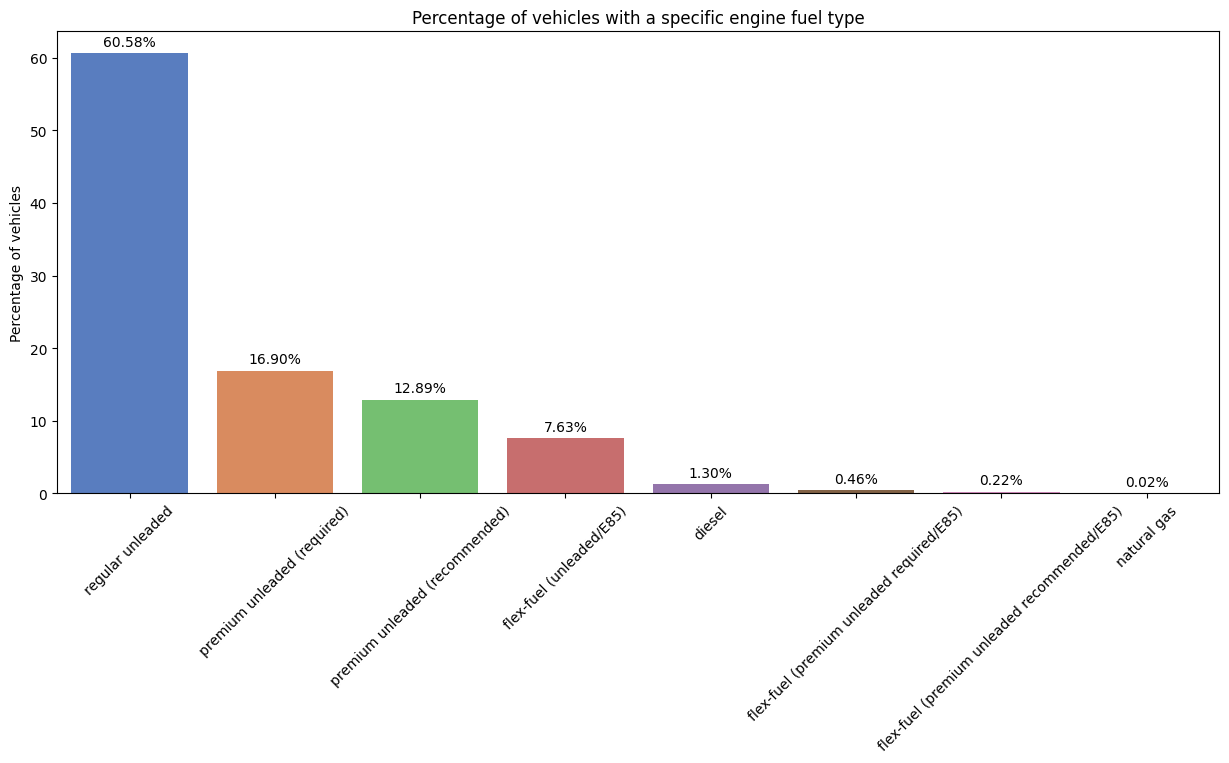

In [51]:
# What is the percentage of vehicles with a specific engine fuel type?

fuel_type_percentage = df['Engine Fuel Type'].value_counts(normalize = True) * 100  # calculate the percentage of each fuel type

plt.figure(figsize = (15, 6))
sns.barplot(x = fuel_type_percentage.index, y = fuel_type_percentage.values, palette = 'muted')
plt.title('Percentage of vehicles with a specific engine fuel type')
plt.xlabel('')
plt.ylabel('Percentage of vehicles')

for index, value in enumerate(fuel_type_percentage): # adding percentages on top of each bar
    plt.text(index, value + 1, '{:.2f}%'.format(value), ha = 'center', fontsize = 10)
plt.xticks(rotation = 45)  # rotate x-labels for better readability

import warnings
warnings.filterwarnings("ignore", category = FutureWarning)  # Ignore any future warnings
plt.show()

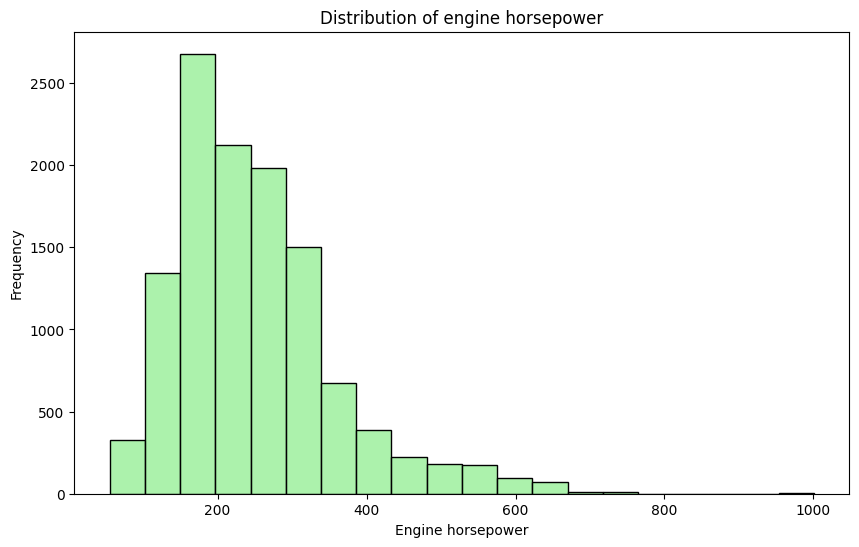

In [52]:
# What is the distribution of engine horsepower among the vehicles?

plt.figure(figsize = (10, 6))
sns.histplot(data = df, x = 'Engine HP', bins = 20, color = 'lightgreen')
plt.title('Distribution of engine horsepower')
plt.xlabel('Engine horsepower')
plt.ylabel('Frequency')
plt.show()

In [53]:
# What is the average highway MPG of vehicles with a specific driven wheels type?

average_highway_MPG = df.groupby('Driven_Wheels')['highway MPG'].mean().round(2)
average_highway_MPG_no_header = average_highway_MPG.to_string(header = False) # removing header from return value

print("The average highway MPG of vehicles by wheels type:")
print(average_highway_MPG_no_header)

The average highway MPG of vehicles by wheels type:
all wheel drive      25.79
four wheel drive     19.79
front wheel drive    30.89
rear wheel drive     22.69


In [54]:
# What is the most common vehicle market category?

most_common_market_category = df['Market Category'].mode().values[0]
print(f"The most common vehicle market category is {most_common_market_category}.")

The most common vehicle market category is Crossover.


## Section 2:

In [55]:
# What are the mean and median values of the 'MSRP' attribute?

print(f"The median value of the MSRP attribute is: {df['MSRP'].median()}")
print(f"The mean value of the MSRP attribute is: {df['MSRP'].mean().round(2)}")

The median value of the MSRP attribute is: 29985.0
The mean value of the MSRP attribute is: 40627.12


In [56]:
# How many unique values are there in the 'Make' attribute?

import textwrap # importing the library to wrap the row with a specified width

unique_values_make_attribute = ", ".join(df["Make"].unique()) # joining the list of values together with ',' between values
unique_values_make_attribute_wrapped_text = textwrap.fill(unique_values_make_attribute, width = 210) # wrapping the text
unique_values_make_attribute_number = df["Make"].nunique()

print(f"We have a number of unique values in the 'Make' attribute, which are: {unique_values_make_attribute_wrapped_text} with the total number of {unique_values_make_attribute_number}.")

We have a number of unique values in the 'Make' attribute, which are: BMW, Audi, FIAT, Mercedes-Benz, Chrysler, Nissan, Volvo, Mazda, Mitsubishi, Ferrari, Alfa Romeo, Toyota, McLaren, Maybach, Pontiac, Porsche, Saab, GMC, Hyundai, Plymouth, Honda, Oldsmobile, Suzuki, Ford,
Cadillac, Kia, Bentley, Chevrolet, Dodge, Lamborghini, Lincoln, Subaru, Volkswagen, Spyker, Buick, Acura, Rolls-Royce, Maserati, Lexus, Aston Martin, Land Rover, Lotus, Infiniti, Scion, Genesis, HUMMER, Bugatti with the total number of 47.


In [57]:
# What is the standard deviation of the 'highway MPG' attribute?

st_dev_highway_MPG = df['highway MPG'].std()
print(f"The standard deviation of the Highway MPG attribute is {st_dev_highway_MPG:.3f}")

The standard deviation of the Highway MPG attribute is 6.988


In [58]:
# What is the 75th percentile of the 'Engine HP' attribute?

Engine_HP_75 = df['Engine HP'].quantile(0.75)
print(Engine_HP_75)

300.0


In [59]:
# How many missing values are there in the 'Engine Cylinders' attribute?

df_csv_uncleaned = pd.read_csv('car_dataset_uncleaned.csv')
df_uncleaned = pd.DataFrame(df_csv_uncleaned)
pd.set_option('display.expand_frame_repr', False) # expanding the table to show it in one row
pd.set_option('display.max_colwidth', 20)  # set maximum column width to 40 characters

engine_cylinders_missing = df_uncleaned['Engine Cylinders'].isna().sum()
print(f"The total number of vehicles with missing values in the 'Engine Cylinders' column is {engine_cylinders_missing}.")

The total number of vehicles with missing values in the 'Engine Cylinders' column is 30.


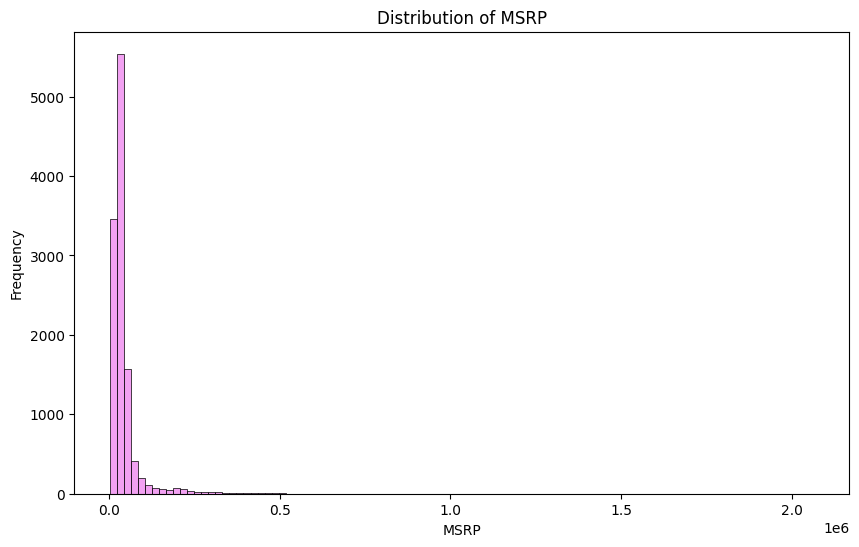

Most values of the 'MSRP' attribute are in the range from 0.0 to 0.5


In [60]:
# Plot a histogram of the 'MSRP' attribute, are there any outliers?

plt.figure(figsize = (10, 6))
sns.histplot(data = df, x = 'MSRP', bins = 100, color = 'violet', edgecolor = 'black')
plt.title('Distribution of MSRP')
plt.xlabel('MSRP')
plt.ylabel('Frequency')
plt.show()

print("Most values of the 'MSRP' attribute are in the range from 0.0 to 0.5")

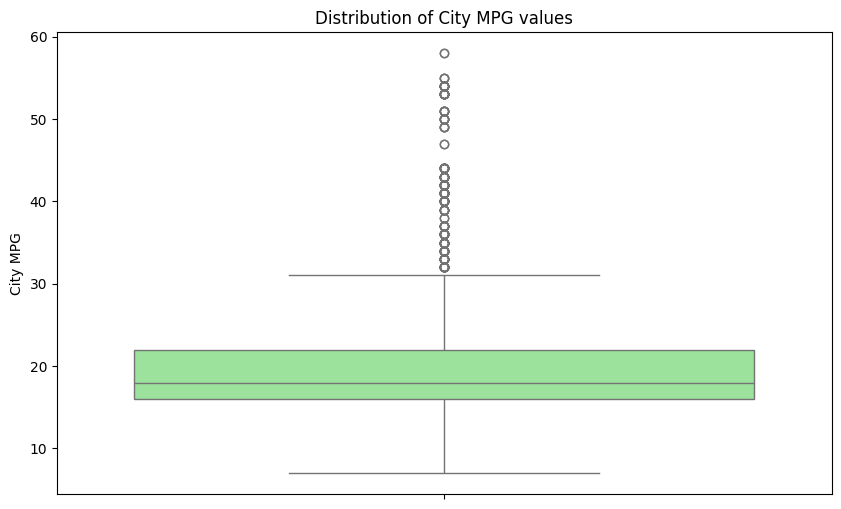

In [61]:
# Visualize the distribution of 'city mpg' using a box plot

plt.figure(figsize = (10, 6))
sns.boxplot(data = df, y = 'city mpg', color = 'lightgreen')
plt.ylabel('City MPG')
plt.title('Distribution of City MPG values')
plt.show()

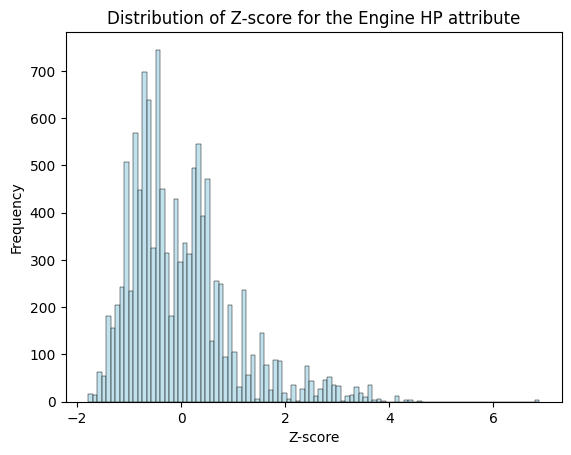

Taking a look at the distribution of z-score values in the histogram below, we can say
that the threshold value of 2 would suffice our research.

Potential outliers in 'Engine HP':



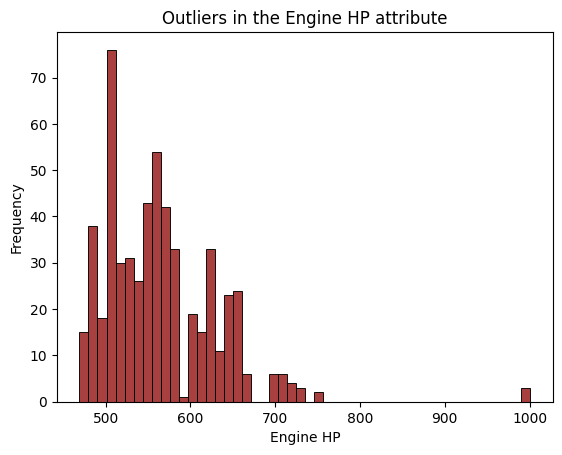

In [62]:
# Identify any potential outliers in the 'Engine HP' attribute using the z-score method

engine_hp_z_score = stats.zscore(df['Engine HP']) # calculating z-scores for the 'Engine HP' attribute
sns.histplot(data = engine_hp_z_score, bins = 100, color = 'lightblue') # plotting the z-score values to see their distribution and identify correct threshold value to eliminate outliers
plt.title('Distribution of Z-score for the Engine HP attribute')
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.show()

threshold = 2 # defining the threshold to remove the outliers against
print(textwrap.fill(f"Taking a look at the distribution of z-score values in the histogram below, we can say that the threshold value of {threshold} would suffice our research.", width = 90))

outliers = df[(engine_hp_z_score > threshold) | (engine_hp_z_score < -threshold)] # identifying potential outliers based on threshold
print("\nPotential outliers in 'Engine HP':\n") # adding a blank space between rows
sns.histplot(data = outliers, x = 'Engine HP', bins = 50, color = 'darkred') # plotting the z-score values to see their distribution and identify correct threshold value to eliminate outliers
plt.title('Outliers in the Engine HP attribute')
plt.xlabel('Engine HP')
plt.ylabel('Frequency')
plt.show()

In [63]:
# Calculate the correlation coefficient between 'Engine Cylinders' and 'MSRP'

corr_mpg = df['Engine Cylinders'].corr(df['MSRP']).round(3)
print(f"The correlation between 'Engine Cylinders' and 'MSRP' is {corr_mpg}")

The correlation between 'Engine Cylinders' and 'MSRP' is 0.547


In [64]:
# Is there a correlation between 'highway MPG' and 'city mpg', is it positive or negative?

corr_mpg = df['highway MPG'].corr(df['city mpg']).round(3)
print(textwrap.fill((f"The correlation between 'Highway MPG' and 'City MPG' is {corr_mpg}, strongly implying that the correlation between these features is highly positive."), width = 90))

The correlation between 'Highway MPG' and 'City MPG' is 0.833, strongly implying that the
correlation between these features is highly positive.


In [65]:
# Formulate a hypothesis to test whether there is a significant difference in the mean 'MSRP' between vehicles with 2 doors and vehicles with 4 doors

two_doors_msrp = df[df['Number of Doors'] == 2]['MSRP'].mean().round(2)
four_doors_msrp = df[df['Number of Doors'] == 4]['MSRP'].mean().round(2)

print(f"The mean value in MSRP for vehicles with 2 doors is {two_doors_msrp}.")
print(f"At the same time, the mean value in MSRP for vehicles with 4 doors is {four_doors_msrp}.")
print()
print(textwrap.fill((f"By subtracting the mean value for 2-door vehicles from the mean value for 4-door vehicles, we get {two_doors_msrp-four_doors_msrp}. This indicates that there is a significant difference between these values."), width = 110))

The mean value in MSRP for vehicles with 2 doors is 54917.58.
At the same time, the mean value in MSRP for vehicles with 4 doors is 36247.98.

By subtracting the mean value for 2-door vehicles from the mean value for 4-door vehicles, we get 18669.6.
This indicates that there is a significant difference between these values.


In [66]:
# Perform a t-test to determine if there is a statistically significant difference in the mean 'city mpg' between vehicles with automatic and manual transmission types

automatic_city_mpg = df[df['Transmission Type'] == 'AUTOMATIC']['city mpg']
manual_city_mpg = df[df['Transmission Type'] == 'MANUAL']['city mpg']

import scipy.stats
t_statistic, p_value = scipy.stats.ttest_ind(automatic_city_mpg, manual_city_mpg, equal_var = False) # performing t-test

a = 0.05 # defining the coefficient value to check against
if p_value < a:
    print("There is a statistically significant difference in the mean 'City MPG' between vehicles with automatic and manual transmissions.")
else:
    print("There is no statistically significant difference in the mean 'City MPG' between vehicles with automatic and manual transmissions.")

p_value_decimal = "{:.13f}".format(p_value) # formatting the p value
print(f"The corresponding p value for the provided test hypothesis is {p_value_decimal}.")

There is a statistically significant difference in the mean 'City MPG' between vehicles with automatic and manual transmissions.
The corresponding p value for the provided test hypothesis is 0.0000000000138.


## Section 3:

We'll use boxplot to identify whether there are any outliers in the 'highway MPG' attribute.



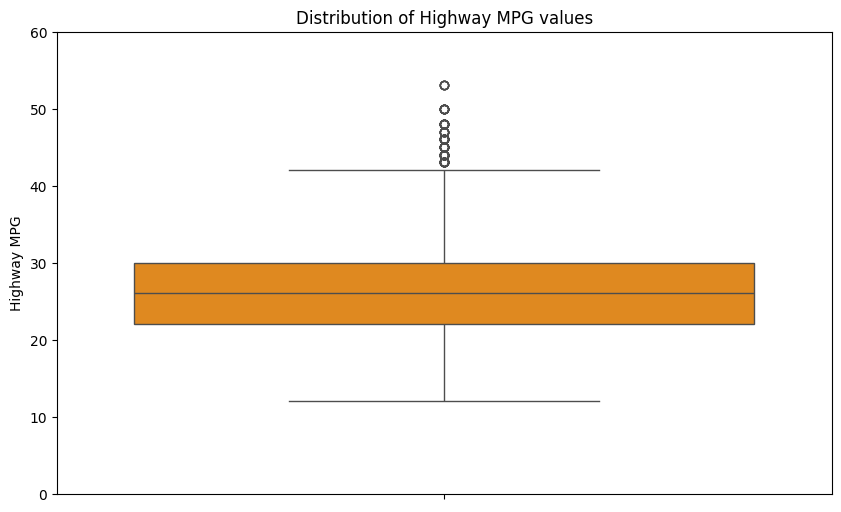


The resulting boxplot shows a number of values outside of the scope of the figure, indicating that there are indeed outliers in the attribute.


In [67]:
# Checking if there are any outliers in the 'highway MPG' attribute

print("We'll use boxplot to identify whether there are any outliers in the 'highway MPG' attribute.")
print()

plt.figure(figsize = (10, 6))
sns.boxplot(data = df, y = 'highway MPG', color = 'darkorange')
plt.ylim(0, 60)  # adjusting the y-axis limits to avoid an extreme outlier
plt.ylabel('Highway MPG')
plt.title('Distribution of Highway MPG values')
plt.show()

print("\nThe resulting boxplot shows a number of values outside of the scope of the figure, indicating that there are indeed outliers in the attribute.")

First, we'll visualise the data using a scatter plot, with additional grouping by Make.



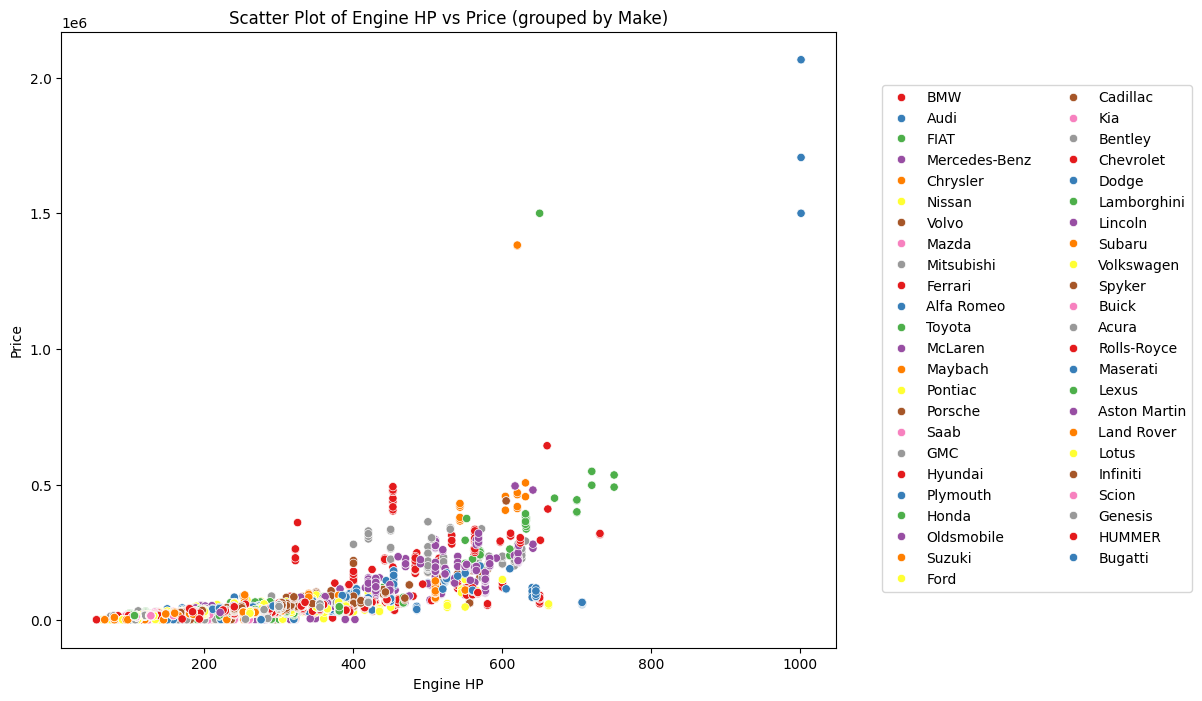


We can already see that there are a few outliers in the data, and that there seems to be a positive correlation between the two attributes.
Let's dive deeper and try to find the correlation value, using Pearson method.

The correlation coefficient between Engine HP and Price is 0.662, which indicates that there is a positive correlation between these two attributes.


In [68]:
# Exploring the relationship between engine horsepower and vehicle price

print("First, we'll visualise the data using a scatter plot, with additional grouping by Make.")
print()
plt.figure(figsize=(10, 8))
sns.scatterplot(data = df, x = 'Engine HP', y = 'MSRP', hue = 'Make', palette = 'Set1')
plt.title('Scatter Plot of Engine HP vs Price (grouped by Make)')
plt.xlabel('Engine HP')
plt.ylabel('Price')
plt.legend(bbox_to_anchor = (1.05, 0.925), loc = 'upper left', ncol = 2) # formatting legend to show in two columns and its positioning
plt.show()

print("\nWe can already see that there are a few outliers in the data, and that there seems to be a positive correlation between the two attributes.")
print("Let's dive deeper and try to find the correlation value, using Pearson method.")

from scipy.stats import pearsonr

hp_msrp_correlation, _ = pearsonr(df['Engine HP'], df['MSRP']) # checking for correlation between 'Engine HP' and 'MSRP'
print()
print(f'The correlation coefficient between Engine HP and Price is {hp_msrp_correlation:.3f}, which indicates that there is a positive correlation between these two attributes.')

In [70]:
# Testing whether there is a significant difference in the average price of vehicles with automatic and manual transmission types

automatic_transmission_prices = df[df['Transmission Type'] == 'AUTOMATIC']['MSRP']
manual_transmission_prices = df[df['Transmission Type'] == 'MANUAL']['MSRP']

import scipy.stats
t_statistic, p_value = scipy.stats.ttest_ind(automatic_transmission_prices, manual_transmission_prices, equal_var = False) # performing the t-test

a = 0.05 # setting significance level for p value

if p_value < a:
    print(textwrap.fill(("Reject the null hypothesis. There is a significant difference in the average price of vehicles with automatic and manual transmission types."), width = 150))
else:
    print(textwrap.fill(("Fail to reject the null hypothesis. There is no significant difference in the average price of vehicles with automatic and manual transmission types."), width = 150))

print("\nResults to support our conclusion:")
print(f"t-statistic: {t_statistic:.2f}")
print(f"p-value: {p_value:.56f}")

Reject the null hypothesis. There is a significant difference in the average price of vehicles with automatic and manual transmission types.

Results to support our conclusion:
t-statistic: 15.79
p-value: 0.00000000000000000000000000000000000000000000000000000045
